## Art style prediction - Modelo de detección de la corriente artística

Modelo basado en la red neuronal convolucional VGG16 que detecta la corriente artística de la obra de arte que entra como input al modelo.

Fuente de referencia para el modelo:

https://github.com/gregoirelafay/neural-art

### Carga del modelo ya entrenado

In [9]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Carga del modelo
model = tf.keras.models.load_model("models/VGG16/VGG16model_10epochs")

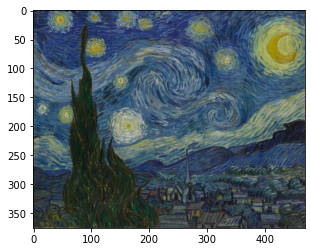

In [3]:
img = cv2.imread('img/sn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img,(224,224))     # resize image to match model's expected sizing
img = np.reshape(img,[1,224,224,3]) # return the image with shaping that TF wants.

In [4]:
prediction = model.predict(img)
prediction

1/1 [==============================] - 2s 2s/step


array([[2.8980428e-02, 1.6550930e-06, 2.5251098e-03, 2.8604716e-01,
        5.9966207e-01, 5.9699785e-02, 7.7196429e-03, 1.5364079e-02]],
      dtype=float32)

In [5]:
styles = ['abstract', 'color_field_painting', 'cubism', 'expressionism',
        'impressionism', 'realism', 'renaissance', 'romanticism']

In [6]:
df = pd.DataFrame({'styles':styles, 'prediction':prediction[0]*100})
df

,styles,prediction
0,abstract,2.898043
1,color_field_painting,0.000166
2,cubism,0.252511
3,expressionism,28.604715
4,impressionism,59.966206
5,realism,5.969978
6,renaissance,0.771964
7,romanticism,1.536408


In [7]:
df2 = df.sort_values(by = 'prediction', ascending = False).reset_index()
style1 = df2['styles'][0]
style2 = df2['styles'][1]
style3 = df2['styles'][2]

In [8]:
f'This painting belongs to {style1}, {style2}, {style3}'

'This painting belongs to impressionism, expressionism, realism'